<a href="https://colab.research.google.com/github/ruwanwija/Research-Models/blob/main/Flood_Prediction_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Dataset Preview:
   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instea


OVERALL ACCURACY: 0.8243 (82.43%)

Classification Report:
              precision    recall  f1-score   support

       Alert       0.70      0.88      0.78        24
    Critical       0.00      0.00      0.00         1
       Major       0.00      0.00      0.00         1
       Minor       0.33      0.22      0.27         9
          No       1.00      0.97      0.99        39

    accuracy                           0.82        74
   macro avg       0.41      0.41      0.41        74
weighted avg       0.79      0.82      0.80        74


Confusion Matrix:
[[21  0  0  3  0]
 [ 0  0  0  1  0]
 [ 1  0  0  0  0]
 [ 7  0  0  2  0]
 [ 1  0  0  0 38]]


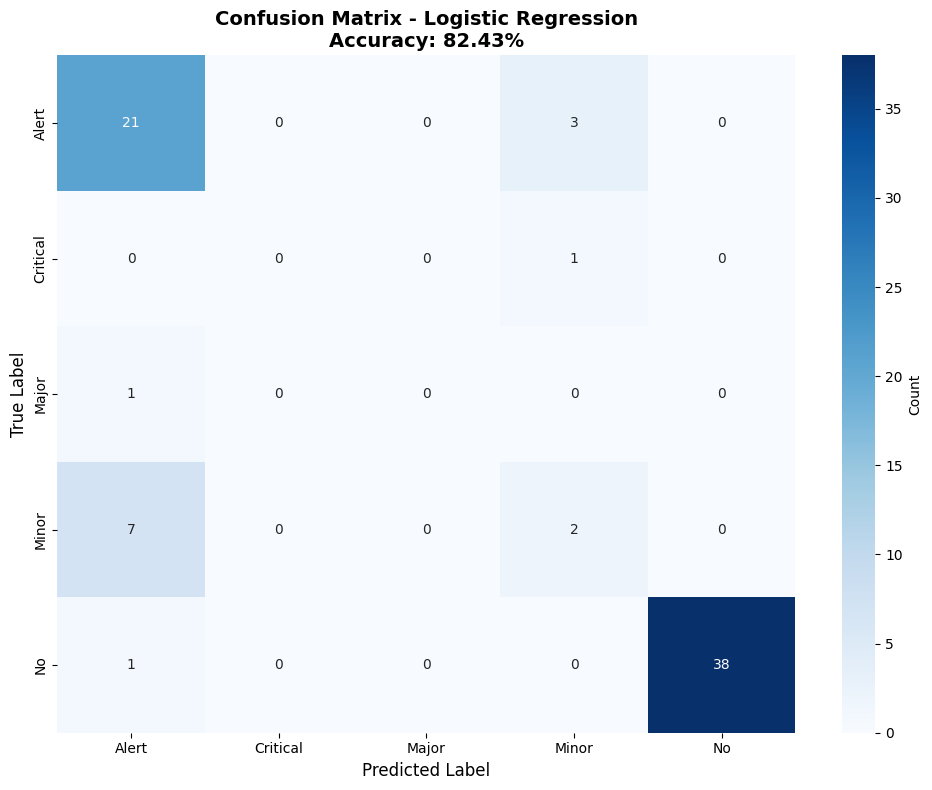


Cross-Validation Complete!


In [363]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Flood_Status'].value_counts())

# Separate features and target
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

# Identify feature types
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create full pipeline with Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'))
])

# Stratified K-Fold Cross-Validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-Fold Stratified Cross-Validation with Logistic Regression...")

# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# Calculate and display accuracy
accuracy = accuracy_score(y, y_pred)
print("\n" + "="*60)
print(f"OVERALL ACCURACY: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("="*60)

# Get actual class names from data
target_names = sorted(y.unique())

# Classification report
report = classification_report(y, y_pred, target_names=[str(name) for name in target_names])
print("\nClassification Report:")
print(report)

# Confusion matrix
conf_mat = confusion_matrix(y, y_pred)

print("\nConfusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - Logistic Regression\nAccuracy: {accuracy:.2%}',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Cross-Validation Complete!")
print("="*60)

# K-NN Algorithm

Dataset Preview:
   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



OVERALL ACCURACY: 0.8108 (81.08%)

Classification Report:
              precision    recall  f1-score   support

       Alert       0.71      0.92      0.80        24
    Critical       0.00      0.00      0.00         1
       Major       0.00      0.00      0.00         1
       Minor       0.00      0.00      0.00         9
          No       0.90      0.97      0.94        39

    accuracy                           0.81        74
   macro avg       0.32      0.38      0.35        74
weighted avg       0.71      0.81      0.75        74


Confusion Matrix:
[[22  0  0  0  2]
 [ 0  0  0  1  0]
 [ 1  0  0  0  0]
 [ 7  0  0  0  2]
 [ 1  0  0  0 38]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


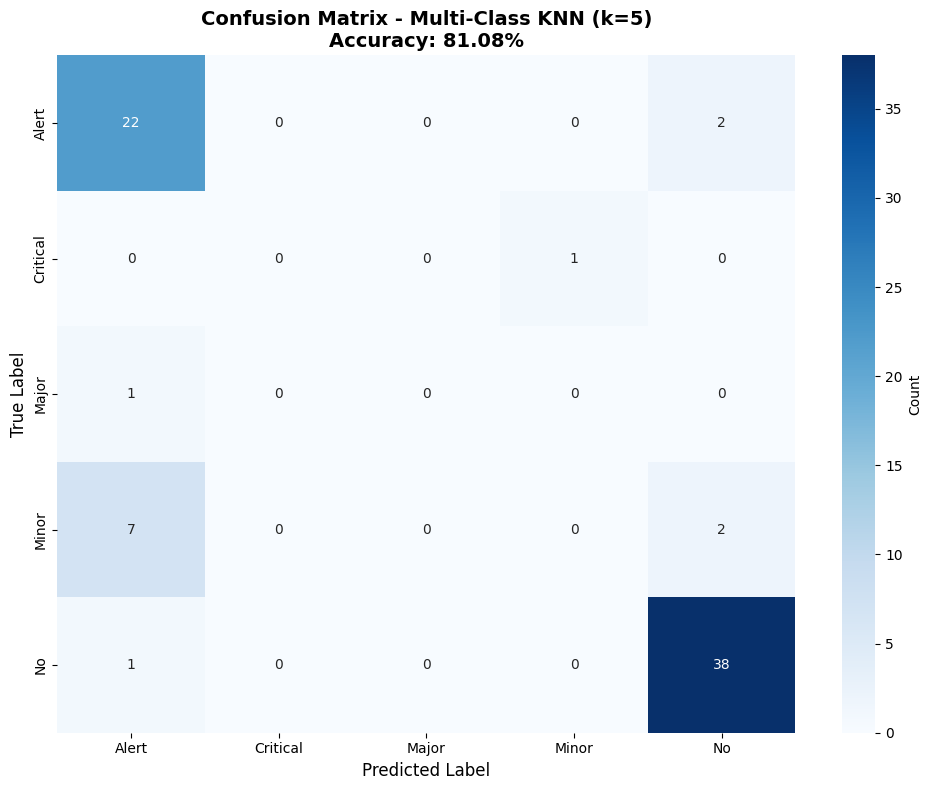


Cross-Validation Complete!


In [358]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Flood_Status'].value_counts())

# Separate features and target
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

# Identify feature types
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create full pipeline with KNN
k = 5  # You can change the value of 'k' as needed
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=k))
])

# Stratified K-Fold Cross-Validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-Fold Stratified Cross-Validation with k={k}...")

# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# Calculate and display accuracy
accuracy = accuracy_score(y, y_pred)
print("\n" + "="*60)
print(f"OVERALL ACCURACY: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("="*60)

# Get actual class names from data
target_names = sorted(y.unique())

# Classification report
report = classification_report(y, y_pred, target_names=[str(name) for name in target_names])
print("\nClassification Report:")
print(report)

# Confusion matrix
conf_mat = confusion_matrix(y, y_pred)

print("\nConfusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - Multi-Class KNN (k={k})\nAccuracy: {accuracy:.2%}',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Cross-Validation Complete!")
print("="*60)

# Naive Bayes

Dataset Preview:
   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

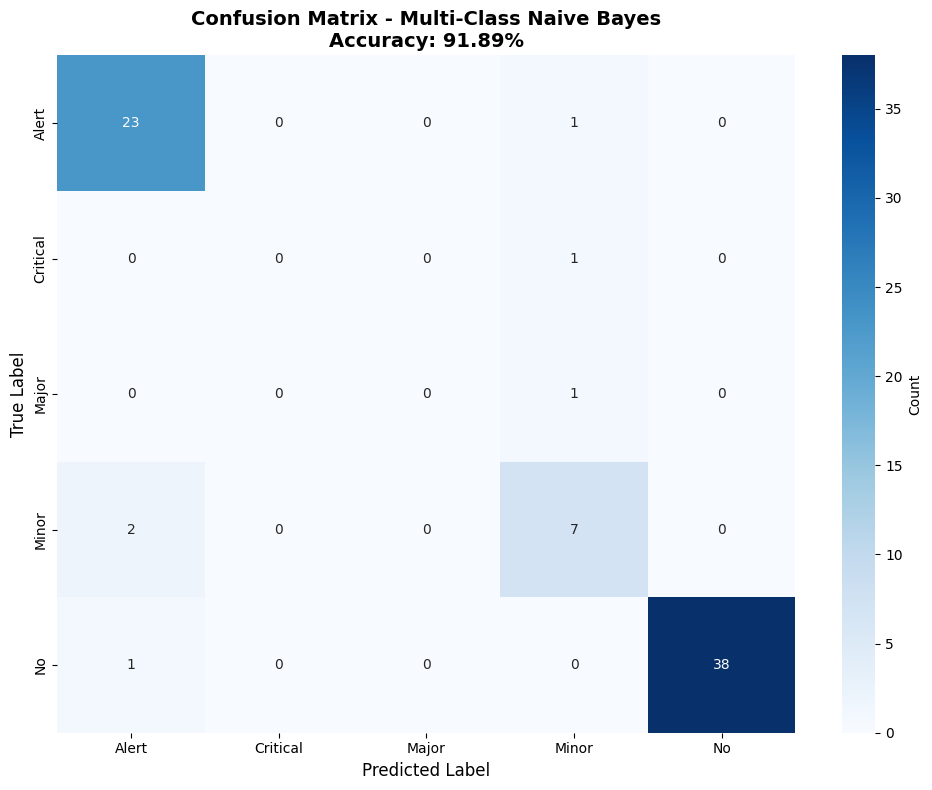


Cross-Validation Complete!


In [365]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Flood_Status'].value_counts())

# Separate features and target
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

# Identify feature types
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create full pipeline with Naive Bayes
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Stratified K-Fold Cross-Validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-Fold Stratified Cross-Validation with Gaussian Naive Bayes...")

# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# Calculate and display accuracy
accuracy = accuracy_score(y, y_pred)
print("\n" + "="*60)
print(f"OVERALL ACCURACY: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("="*60)

# Get actual class names from data
target_names = sorted(y.unique())

# Classification report
report = classification_report(y, y_pred, target_names=[str(name) for name in target_names])
print("\nClassification Report:")
print(report)

# Confusion matrix
conf_mat = confusion_matrix(y, y_pred)

print("\nConfusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - Multi-Class Naive Bayes\nAccuracy: {accuracy:.2%}',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Cross-Validation Complete!")
print("="*60)

# SVM

Dataset Preview:
   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



OVERALL ACCURACY: 0.8243 (82.43%)

Classification Report:
              precision    recall  f1-score   support

       Alert       0.66      0.96      0.78        24
    Critical       0.00      0.00      0.00         1
       Major       0.00      0.00      0.00         1
       Minor       0.00      0.00      0.00         9
          No       1.00      0.97      0.99        39

    accuracy                           0.82        74
   macro avg       0.33      0.39      0.35        74
weighted avg       0.74      0.82      0.77        74


Confusion Matrix:
[[23  0  0  1  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 9  0  0  0  0]
 [ 1  0  0  0 38]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


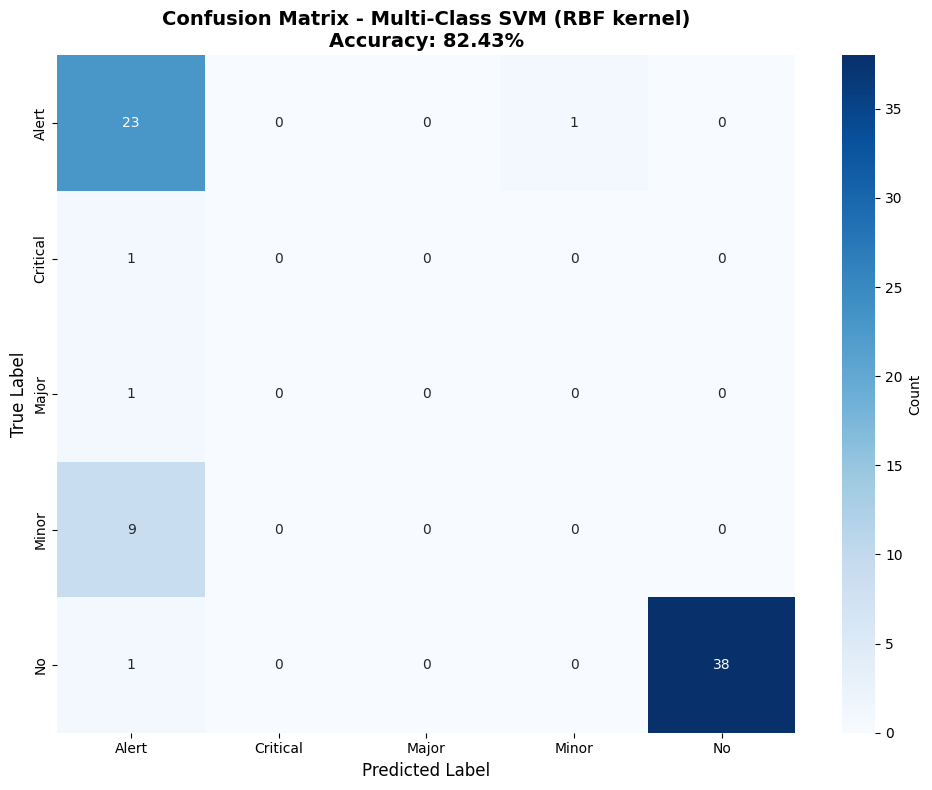


Cross-Validation Complete!


In [366]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Flood_Status'].value_counts())

# Separate features and target
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

# Identify feature types
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create full pipeline with SVM
# Common kernel options: 'linear', 'rbf', 'poly', 'sigmoid'
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])

# Stratified K-Fold Cross-Validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-Fold Stratified Cross-Validation with SVM (RBF kernel)...")

# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# Calculate and display accuracy
accuracy = accuracy_score(y, y_pred)
print("\n" + "="*60)
print(f"OVERALL ACCURACY: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("="*60)

# Get actual class names from data
target_names = sorted(y.unique())

# Classification report
report = classification_report(y, y_pred, target_names=[str(name) for name in target_names])
print("\nClassification Report:")
print(report)

# Confusion matrix
conf_mat = confusion_matrix(y, y_pred)

print("\nConfusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - Multi-Class SVM (RBF kernel)\nAccuracy: {accuracy:.2%}',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Cross-Validation Complete!")
print("="*60)

#Decision Tree

Dataset Preview:
   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

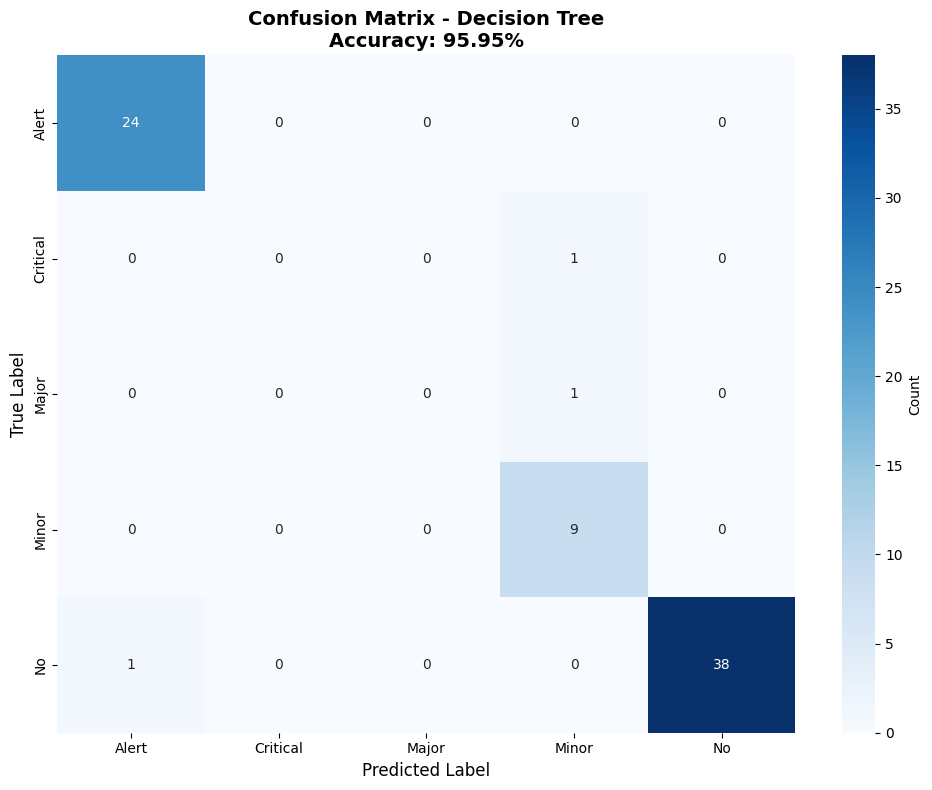


Training final model on complete dataset for visualization...


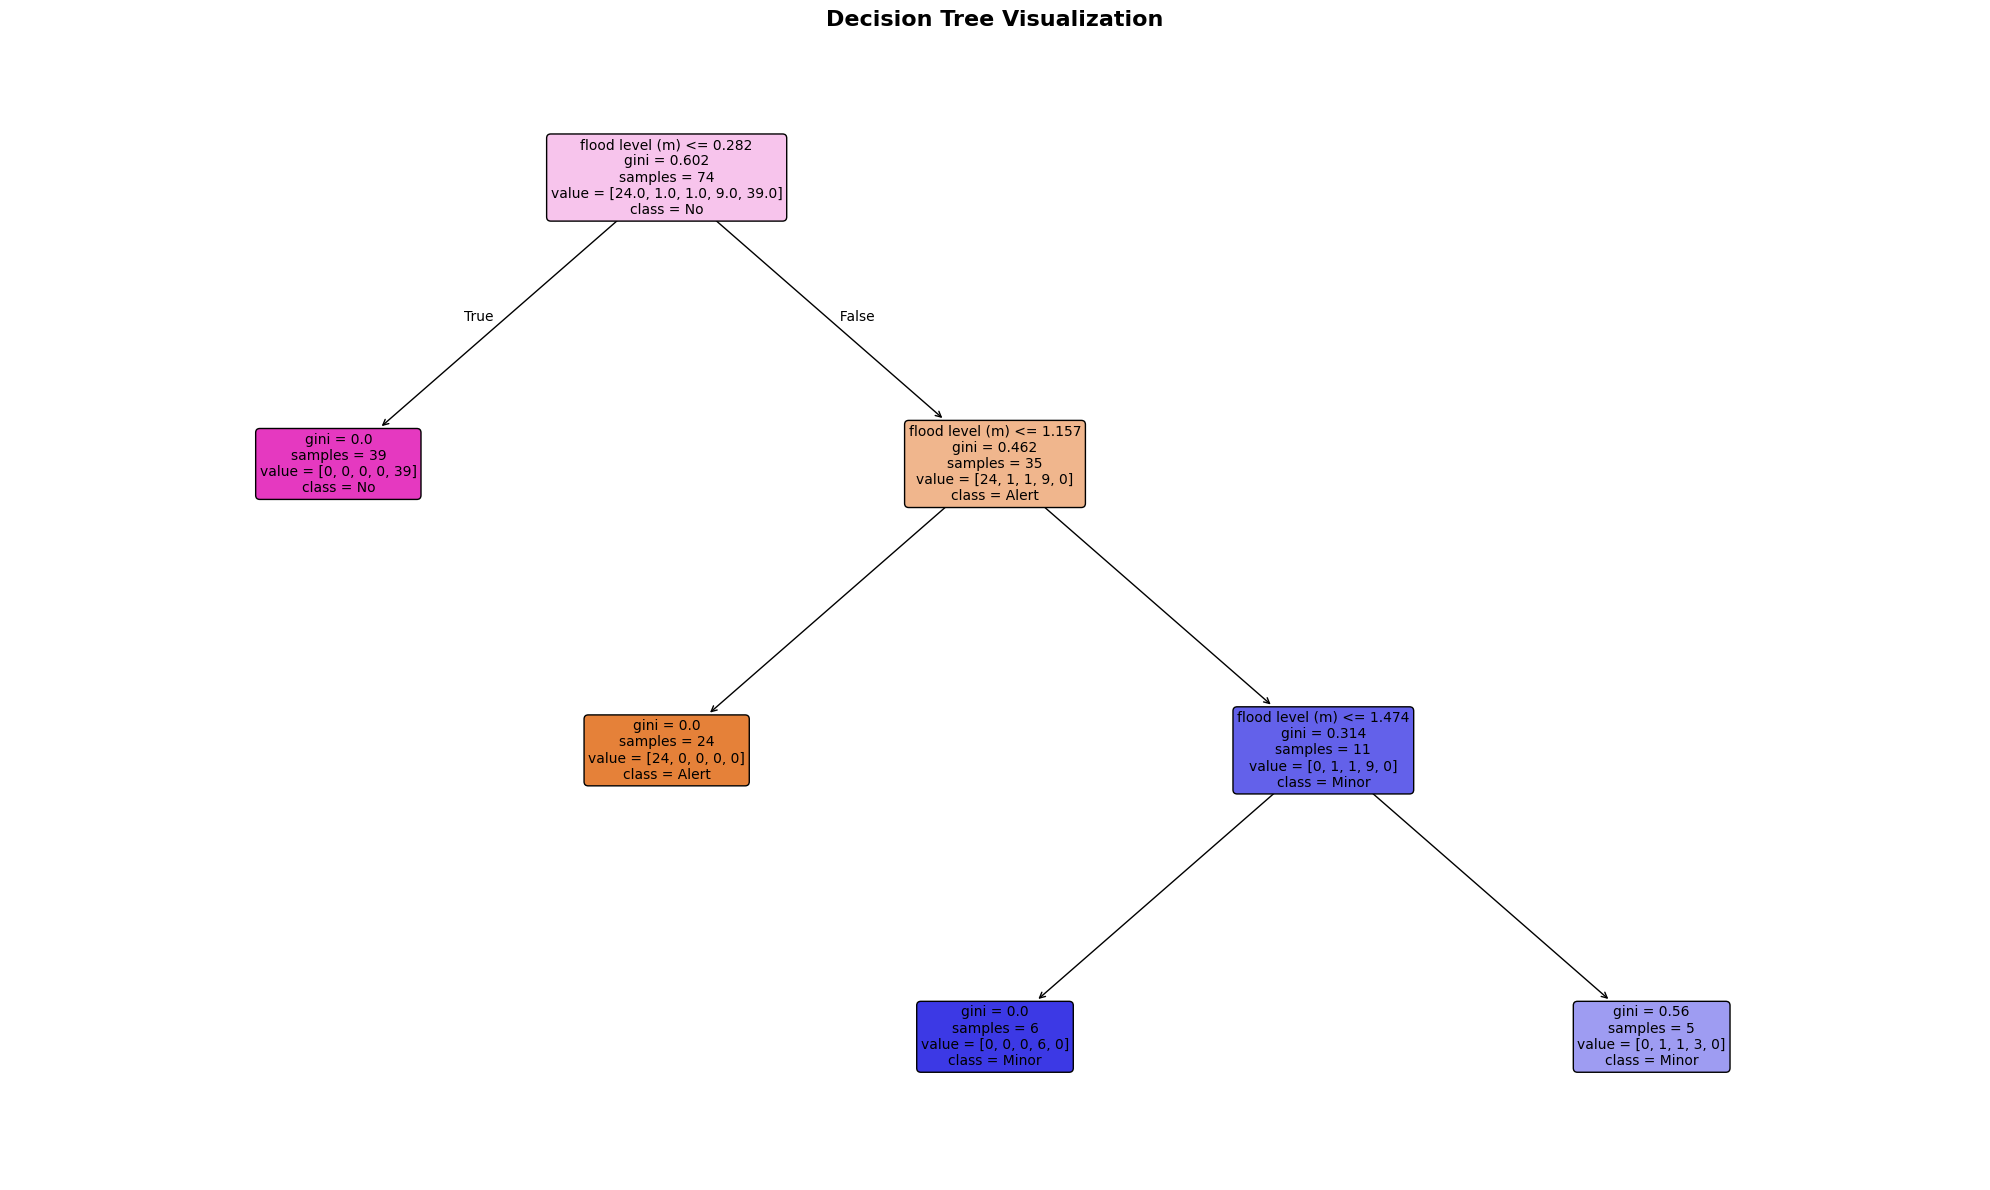


Cross-Validation Complete!


In [368]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Flood_Status'].value_counts())

# Separate features and target
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

# Identify feature types
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create full pipeline with Decision Tree
# You can adjust these hyperparameters as needed
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=10,           # Maximum depth of the tree
        min_samples_split=10,   # Minimum samples required to split a node
        min_samples_leaf=5,     # Minimum samples required at leaf node
        random_state=42,        # For reproducibility
        criterion='gini'        # Split criterion: 'gini' or 'entropy'
    ))
])

# Stratified K-Fold Cross-Validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-Fold Stratified Cross-Validation with Decision Tree...")

# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# Calculate and display accuracy
accuracy = accuracy_score(y, y_pred)
print("\n" + "="*60)
print(f"OVERALL ACCURACY: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("="*60)

# Get actual class names from data
target_names = sorted(y.unique())

# Classification report
report = classification_report(y, y_pred, target_names=[str(name) for name in target_names])
print("\nClassification Report:")
print(report)

# Confusion matrix
conf_mat = confusion_matrix(y, y_pred)

print("\nConfusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - Decision Tree\nAccuracy: {accuracy:.2%}',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Optional: Visualize the final decision tree (trained on full dataset)
print("\nTraining final model on complete dataset for visualization...")
pipeline.fit(X, y)
final_tree = pipeline.named_steps['classifier']

# Get feature names after preprocessing
feature_names = []
if numerical_features:
    feature_names.extend(numerical_features)
if categorical_features:
    cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
    feature_names.extend(cat_encoder.get_feature_names_out(categorical_features))

# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(final_tree,
          feature_names=feature_names,
          class_names=[str(name) for name in target_names],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Cross-Validation Complete!")
print("="*60)

#Linear Regression

In [369]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())  # Check data types and missing values

# Handle missing values
df = df.dropna()

# Encode categorical variables if present
# (Apply this to categorical FEATURE columns, not the target)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('flood level (m)', errors='ignore')

for col in categorical_columns:
    df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})

# Separate features and target
X = df.drop('flood level (m)', axis=1)
y = df['flood level (m)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred = cross_val_predict(lr_model, X, y, cv=kfold)

cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results:")
print(f"CV Mean Squared Error: {cv_mse:.4f}")
print(f"CV Mean Absolute Error: {cv_mae:.4f}")
print(f"CV R-squared: {cv_r2:.4f}")

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

/tmp/ipython-input-2135515143.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})


# Ridge Regression

In [370]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())

# Handle missing values
df = df.dropna()

# Encode categorical variables if present
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('flood level (m)', errors='ignore')

for col in categorical_columns:
    df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})

# Separate features and target
X = df.drop('flood level (m)', axis=1)
y = df['flood level (m)']

# Feature scaling (recommended for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Ridge Regression model
# alpha is the regularization strength (you can tune this)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRidge Regression - Test Set Results:")
print(f"Alpha (regularization): {ridge_model.alpha}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred = cross_val_predict(ridge_model, X_scaled, y, cv=kfold)

cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nRidge Regression - Cross-Validation Results:")
print(f"CV Mean Squared Error: {cv_mse:.4f}")
print(f"CV Mean Absolute Error: {cv_mae:.4f}")
print(f"CV R-squared: {cv_r2:.4f}")

# Optional: Display feature coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(df.drop('flood level (m)', axis=1).columns, ridge_model.coef_):
    print(f"{feature}: {coef:.4f}")

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

/tmp/ipython-input-1090728599.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})


In [371]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Handle missing values
df = df.dropna()
print(f"\nDataset shape after removing missing values: {df.shape}")

# Encode categorical variables if present
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('flood level (m)', errors='ignore')

for col in categorical_columns:
    df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})

# Separate features and target
X = df.drop('flood level (m)', axis=1)
y = df['flood level (m)']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Feature scaling (recommended for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# ==================== ALPHA PARAMETER TUNING ====================
print("\n" + "="*60)
print("TUNING ALPHA PARAMETER WITH GRID SEARCH")
print("="*60)

# Define parameter grid for alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
}

# Initialize Ridge model
ridge = Ridge(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Display grid search results
print(f"\nBest Alpha Parameter: {grid_search.best_params_['alpha']}")
print(f"Best Cross-Validation MSE: {-grid_search.best_score_:.4f}")

# Display all results
print("\nAll Alpha Values and their CV Scores:")
results_df = pd.DataFrame(grid_search.cv_results_)
for alpha, mean_score, std_score in zip(
    results_df['param_alpha'],
    -results_df['mean_test_score'],
    results_df['std_test_score']
):
    print(f"Alpha: {alpha:8.3f} | CV MSE: {mean_score:.4f} (±{std_score:.4f})")

# ==================== BEST MODEL EVALUATION ====================
print("\n" + "="*60)
print("BEST RIDGE REGRESSION MODEL EVALUATION")
print("="*60)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Predictions on test set
y_pred = best_ridge_model.predict(X_test)

# Test set metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nTest Set Results (Best Model):")
print(f"Alpha (regularization): {best_ridge_model.alpha}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# ==================== CROSS-VALIDATION WITH BEST MODEL ====================
print("\n" + "="*60)
print("CROSS-VALIDATION WITH BEST MODEL")
print("="*60)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred = cross_val_predict(best_ridge_model, X_scaled, y, cv=kfold)

cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)
cv_rmse = np.sqrt(cv_mse)

print(f"\nCross-Validation Results:")
print(f"CV Root Mean Squared Error: {cv_rmse:.4f}")
print(f"CV Mean Squared Error: {cv_mse:.4f}")
print(f"CV Mean Absolute Error: {cv_mae:.4f}")
print(f"CV R-squared: {cv_r2:.4f}")

# ==================== FEATURE COEFFICIENTS ====================
print("\n" + "="*60)
print("FEATURE IMPORTANCE (COEFFICIENTS)")
print("="*60)

# Get feature names
feature_names = df.drop('flood level (m)', axis=1).columns

# Create a dataframe of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_ridge_model.coef_
})

# Sort by absolute value of coefficient
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by importance):")
for idx, row in coef_df.iterrows():
    print(f"{row['Feature']:30s}: {row['Coefficient']:8.4f}")

# ==================== COMPARISON: RIDGE VS LINEAR REGRESSION ====================
print("\n" + "="*60)
print("COMPARISON: RIDGE VS LINEAR REGRESSION")
print("="*60)

from sklearn.linear_model import LinearRegression

# Train simple Linear Regression for comparison
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression (No Regularization):")
print(f"RMSE: {lr_rmse:.4f} | MAE: {lr_mae:.4f} | R²: {lr_r2:.4f}")

print(f"\nRidge Regression (Alpha={best_ridge_model.alpha}):")
print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

print("\nImprovement with Ridge:")
print(f"RMSE Reduction: {((lr_rmse - rmse) / lr_rmse * 100):.2f}%")
print(f"MAE Reduction: {((lr_mae - mae) / lr_mae * 100):.2f}%")
print(f"R² Change: {((r2 - lr_r2) / abs(lr_r2) * 100):.2f}%")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

Dataset Preview:
   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \

/tmp/ipython-input-3373271385.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})



Best Alpha Parameter: 5.0
Best Cross-Validation MSE: 1.6786

All Alpha Values and their CV Scores:
Alpha:    0.001 | CV MSE: 3.1177 (±1.5706)
Alpha:    0.010 | CV MSE: 3.0012 (±1.4696)
Alpha:    0.100 | CV MSE: 2.4749 (±0.9082)
Alpha:    0.500 | CV MSE: 1.9856 (±0.4342)
Alpha:    1.000 | CV MSE: 1.8293 (±0.2957)
Alpha:    5.000 | CV MSE: 1.6786 (±0.3444)
Alpha:   10.000 | CV MSE: 1.8839 (±0.6319)
Alpha:   50.000 | CV MSE: 4.1514 (±1.1847)
Alpha:  100.000 | CV MSE: 5.9034 (±1.5136)
Alpha:  500.000 | CV MSE: 10.1656 (±2.3430)
Alpha: 1000.000 | CV MSE: 11.4252 (±2.5539)

BEST RIDGE REGRESSION MODEL EVALUATION

Test Set Results (Best Model):
Alpha (regularization): 5.0
Root Mean Squared Error (RMSE): 0.9403
Mean Squared Error (MSE): 0.8842
Mean Absolute Error (MAE): 0.7378
R-squared (R²): 0.9372

CROSS-VALIDATION WITH BEST MODEL

Cross-Validation Results:
CV Root Mean Squared Error: 1.1834
CV Mean Squared Error: 1.4005
CV Mean Absolute Error: 0.9413
CV R-squared: 0.8943

FEATURE IMPORTANC

# Lasso Regression

In [372]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import Lasso  # Changed from LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())  # Check data types and missing values

# Handle missing values
df = df.dropna()

# Encode categorical variables if present
# (Apply this to categorical FEATURE columns, not the target)
categorical_columns = df.select_dtypes(include=['object']).columns
# Assuming 'flood level (m)' is the target variable and is NOT a categorical object type here.
# If it is a categorical object, you may need a different approach for target encoding.
categorical_columns = categorical_columns.drop('flood level (m)', errors='ignore')

# Use Label Encoding for demonstration, assuming order matters for these features
for col in categorical_columns:
    # Ensure all values in the column are map-able, adjust the map as needed for your specific data
    df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})
    # If using OHE (pd.get_dummies) instead, apply it before train-test split

# Separate features and target
X = df.drop('flood level (m)', axis=1)
y = df['flood level (m)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train model using Lasso Regression ---
# Lasso requires an 'alpha' parameter (the regularization strength).
# A common default is alpha=1.0. You may need to tune this value.
# Increase alpha for stronger regularization (more coefficients will be set to zero).
lasso_model = Lasso(alpha=1.0, random_state=42, max_iter=10000) # Added max_iter for convergence stability
lasso_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Results (Lasso Regression):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred = cross_val_predict(lasso_model, X, y, cv=kfold)

cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results (Lasso Regression):")
print(f"CV Mean Squared Error: {cv_mse:.4f}")
print(f"CV Mean Absolute Error: {cv_mae:.4f}")
print(f"CV R-squared: {cv_r2:.4f}")

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

/tmp/ipython-input-2951161055.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})


# Polynomial Regression

In [373]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # New Import
from sklearn.pipeline import Pipeline              # New Import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())  # Check data types and missing values

# Handle missing values
df = df.dropna()

# Encode categorical variables if present
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('flood level (m)', errors='ignore')

for col in categorical_columns:
    # Assuming the map for categorical data is appropriate
    df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})

# Separate features and target
X = df.drop('flood level (m)', axis=1)
y = df['flood level (m)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Define the Polynomial Regression Model ---
# 1. Create the Polynomial Features Transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree=2 means X and X^2 terms
# 2. Create the Linear Regression Model
linear_regressor = LinearRegression()
# 3. Chain them into a Pipeline
# The Pipeline ensures the polynomial transformation is applied consistently
# to the training data, test data, and during cross-validation.
poly_model = Pipeline([
    ('poly_features', poly_features),
    ('linear_model', linear_regressor)
])

# Train model (Fit the pipeline to the original features)
print("\nTraining Polynomial Regression Model...")
poly_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = poly_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Results (Polynomial Regression - Degree 2):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# The cross_val_predict function can take the entire pipeline
y_cv_pred = cross_val_predict(poly_model, X, y, cv=kfold)

cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results (Polynomial Regression - Degree 2):")
print(f"CV Mean Squared Error: {cv_mse:.4f}")
print(f"CV Mean Absolute Error: {cv_mae:.4f}")
print(f"CV R-squared: {cv_r2:.4f}")

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

/tmp/ipython-input-2923020570.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})


###Baysian Linear Regression

In [374]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import BayesianRidge # Changed from LinearRegression/Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())  # Check data types and missing values

# Handle missing values
df = df.dropna()

# Encode categorical variables if present
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('flood level (m)', errors='ignore')

for col in categorical_columns:
    # Use integer encoding
    df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})

# Separate features and target
X = df.drop('flood level (m)', axis=1)
y = df['flood level (m)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train model using Bayesian Linear Regression ---
# BayesianRidge estimates the parameters (coefficients and noise precision)
# using an iterative process (similar to expectation-maximization).
br_model = BayesianRidge()
br_model.fit(X_train, y_train)

# Predictions and evaluation
# BayesianRidge returns the mean of the posterior predictive distribution.
y_pred = br_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Results (Bayesian Linear Regression):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred = cross_val_predict(br_model, X, y, cv=kfold)

cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results (Bayesian Linear Regression):")
print(f"CV Mean Squared Error: {cv_mse:.4f}")
print(f"CV Mean Absolute Error: {cv_mae:.4f}")
print(f"CV R-squared: {cv_r2:.4f}")

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

/tmp/ipython-input-3684087266.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Alert': 1, 'Minor': 2, 'Major': 3, 'Critical': 4})
